# EDA

## 1. 데이터셋 통계

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


전체 데이터셋 통계
              Class  Train  Valid  Test  Total
0  DangerousDriving      0      0     0      0
1        Distracted   2304    246   123   2673
2          Drinking      0      0     0      0
3       SafeDriving    900     65    37   1002
4     SleepyDriving   1605    157    75   1837
5              Yawn    786     62    31    879
6             Total   5595    530   266   6391


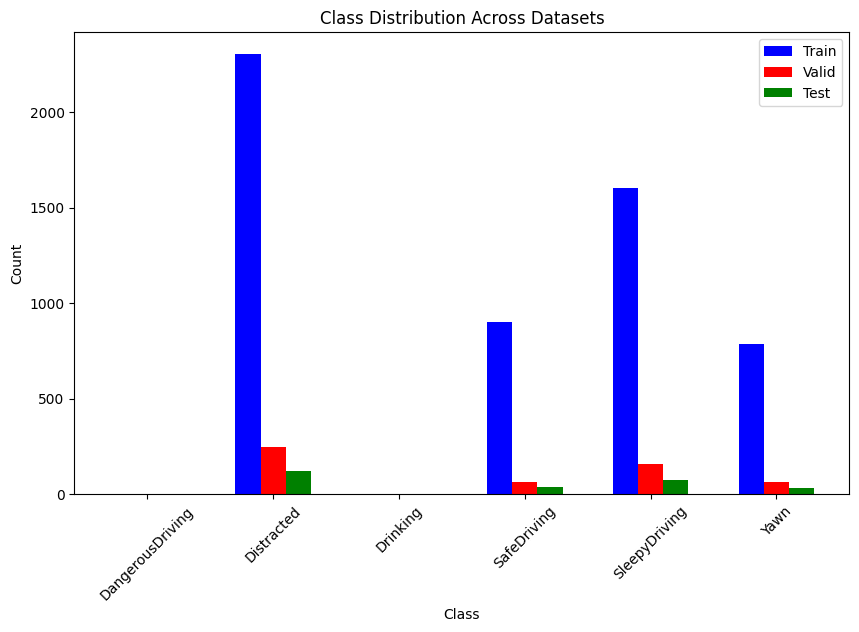

In [7]:
# 클래스 정의
class_mapping = {
    0: "DangerousDriving",
    1: "Distracted",
    2: "Drinking",
    3: "SafeDriving",
    4: "SleepyDriving",
    5: "Yawn"
}

data_path = "org_dataset_vietnam"

# 데이터셋 경로 설정
dataset_dirs = {
    "train": f"/Volumes/G-DRIVE USB/{data_path}/train/labels",
    "valid": f"/Volumes/G-DRIVE USB/{data_path}/valid/labels",
    "test": f"/Volumes/G-DRIVE USB/{data_path}/test/labels"
}

# 전체 데이터 통계 저장용 딕셔너리
overall_class_counts = {class_id: 0 for class_id in class_mapping.keys()}
overall_file_count = 0
dataset_stats = {}

for dataset, path in dataset_dirs.items():
    class_counts = {class_id: 0 for class_id in class_mapping.keys()}
    file_count = 0

    for filename in os.listdir(path):
        if filename.endswith(".txt"):
            file_count += 1
            file_path = os.path.join(path, filename)

            with open(file_path, 'r', encoding='utf-8') as file:
                lines = file.readlines()
                
                for line in lines:
                    class_id = int(line.split()[0])  # 첫 번째 값이 클래스 ID
                    if class_id in class_counts:
                        class_counts[class_id] += 1
                        overall_class_counts[class_id] += 1

    overall_file_count += file_count
    dataset_stats[dataset] = {
        "total_files": file_count,
        "class_counts": {class_mapping[k]: v for k, v in class_counts.items()}
    }

# DataFrame 생성
class_labels = [class_mapping[k] for k in overall_class_counts.keys()]
overall_counts = list(overall_class_counts.values())
train_counts = [dataset_stats["train"]["class_counts"].get(label, 0) for label in class_labels]
valid_counts = [dataset_stats["valid"]["class_counts"].get(label, 0) for label in class_labels]
test_counts = [dataset_stats["test"]["class_counts"].get(label, 0) for label in class_labels]

df = pd.DataFrame({
    "Class": class_labels,
    "Train": train_counts,
    "Valid": valid_counts,
    "Test": test_counts,
    "Total": overall_counts
})

# 각 열의 총합 추가
total_train = df['Train'].sum()
total_valid = df['Valid'].sum()
total_test = df['Test'].sum()
total_overall = df['Total'].sum()

total_row = pd.DataFrame({
    "Class": ["Total"],
    "Train": [total_train],
    "Valid": [total_valid],
    "Test": [total_test],
    "Total": [total_overall]
})

df = pd.concat([df, total_row], ignore_index=True)

# 표 출력
print("\n전체 데이터셋 통계")
print(df)

# 클래스별 그룹화된 막대 그래프 시각화
def plot_grouped_bar_chart(df):
    df_filtered = df[df["Class"] != "Total"]  # Total 행 제거
    x = np.arange(len(df_filtered["Class"]))  # 클래스 개수만큼 x축 인덱스 생성
    width = 0.2  # 막대 너비 설정
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.bar(x - width, df_filtered["Train"], width, label='Train', color='blue')
    ax.bar(x, df_filtered["Valid"], width, label='Valid', color='red')
    ax.bar(x + width, df_filtered["Test"], width, label='Test', color='green')
    
    ax.set_xlabel("Class")
    ax.set_ylabel("Count")
    ax.set_title("Class Distribution Across Datasets")
    ax.set_xticks(x)
    ax.set_xticklabels(df_filtered["Class"], rotation=45)
    ax.legend()
    
    plt.show()

# 클래스별 데이터 분포 시각화
plot_grouped_bar_chart(df)

In [23]:
print(len(os.listdir("/Volumes/G-DRIVE USB/dataset_face_class_only/train/images")))
print(len(os.listdir("/Volumes/G-DRIVE USB/dataset_face_class_only/train/labels")))

print(len(os.listdir("/Volumes/G-DRIVE USB/dataset_face_class_only/valid/images")))
print(len(os.listdir("/Volumes/G-DRIVE USB/dataset_face_class_only/valid/labels")))

print(len(os.listdir("/Volumes/G-DRIVE USB/dataset_face_class_only/test/images")))
print(len(os.listdir("/Volumes/G-DRIVE USB/dataset_face_class_only/test/labels")))

15405
15405
1435
1435
753
753
